stable-difussion 架构图

这张图展示了扩散模型（Diffusion Model）的一种架构，通常用于生成图像的任务，比如图像生成、超分辨率或图像编辑。该架构结合了U-Net与跨注意力机制（cross-attention），并通过**条件输入（Conditioning）**来引导图像生成。图的不同部分表示模型从输入到输出的整个流程，包括从像素空间到潜在空间的映射，以及从噪声中逐步去噪的过程。

1. Pixel Space (像素空间)

	•	左侧的 x 和 x̃ 表示图像数据：
	•	x 表示输入图像。
	•	x̃ 表示经过扩散过程后加入噪声的图像。
	•	Ε（编码器）：将输入图像 ￼ 从像素空间映射到潜在空间，生成潜在向量 ￼，表示高维的抽象特征。
	•	D（解码器）：将扩散过程得到的潜在向量 ￼ 映射回像素空间，生成最终输出的图像。

2. Latent Space (潜在空间)

	•	扩散过程（Diffusion Process）：这是图像生成中的关键步骤。扩散模型逐步添加噪声，模拟一个向潜在空间转换的过程。扩散过程将输入数据逐渐转变为随机噪声，然后通过模型逐步去噪恢复。
	•	￼ 表示加了最多噪声的潜在向量。
	•	￼ 表示去噪的结果，逐步移除噪声。

3. Denoising U-Net (去噪U-Net网络)

	•	U-Net 结构：去噪的核心网络是一个 U-Net，负责将噪声潜在变量逐步还原成没有噪声的表示。在每一个时间步骤 ￼，它会移除噪声。
	•	中间的 U-Net 部分使用了跳跃连接（skip connections），将输入图像中的信息直接传递到解码器部分，使得模型在去噪的过程中能够更好地保留细节。
	•	跨注意力机制（cross-attention）：模型在去噪过程中使用跨注意力机制 ￼ 来从条件输入（如文本、图像等）中提取相关的信息。

4. Conditioning (条件输入)

	•	右侧的 Conditioning 区域展示了条件输入。模型可以通过不同类型的信息进行条件化控制图像生成：
	•	文本：通过自然语言描述生成特定图像。
	•	表示（Representations）：其他图像特征或者信息可以作为条件输入，比如语义地图、草图等。
	•	条件输入通过 ￼ 传递给 U-Net，在去噪过程中通过跨注意力机制整合这些信息，帮助生成与条件输入匹配的图像。

5. 其他元素

	•	去噪步骤（denoising step）：每一个去噪步骤试图逐渐去除噪声，使得噪声潜在向量逐步还原为清晰的图像表示。
	•	跳跃连接（skip connection）：允许输入特征在多个层之间流动，避免信息丢失，帮助生成更高质量的图像。

总体流程总结

	1.	图像 ￼ 被编码为潜在向量 ￼。
	2.	在潜在空间中加入噪声，逐步扩散为 ￼。
	3.	U-Net 在每个时间步骤中通过去噪从 ￼ 逐渐恢复图像。
	4.	去噪过程受到条件输入（文本、语义图等）的引导，通过跨注意力机制从条件中提取相关信息。
	5.	最终生成去噪后的潜在表示 ￼，并通过解码器 ￼ 还原回像素空间，生成清晰图像。

这个架构通常用于像 Stable Diffusion 这样的图像生成模型，通过噪声逐步去噪的方式生成高质量的图像。

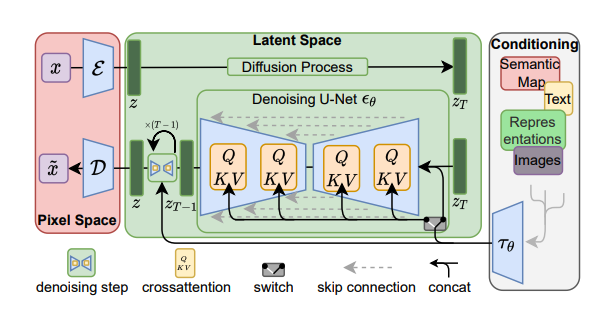

图中的Diffusion Process（扩散过程）指的是扩散模型（Diffusion Model）中的核心步骤，即通过逐步添加噪声和去噪来生成或重建图像的过程。具体的扩散过程可以被分为两个主要步骤：

1. 前向扩散过程（Forward Diffusion Process）

在前向过程中，模型逐渐向输入图像中添加噪声，使得原始图像 ￼ 逐渐转化为纯噪声 ￼。这个过程可以用离散的时间步骤 ￼ 来描述。

	•	初始图像 ￼：这是输入图像，可能是用户提供的真实图像或者生成任务中的随机噪声图像。
	•	逐步添加噪声 ￼：在每个时间步 ￼，我们都会向图像中添加一定的高斯噪声，使得图像逐渐失去原来的信息，变得越来越像随机噪声。
	•	这个过程可以表示为：
￼
其中，￼ 是控制噪声程度的超参数，￼ 是随机噪声。
	•	最终步骤 ￼：经过多次噪声的累加，图像最终变成了接近纯噪声的形式。

2. 逆向扩散过程（Reverse Diffusion Process）

逆向过程是扩散模型的关键部分。在这个过程中，模型从最初的纯噪声开始，逐步去除噪声，最终生成与输入图像相似的高质量图像。这一过程是由一个**去噪神经网络（如 U-Net）**来完成的，该网络学会如何在每个时间步 ￼ 进行去噪。

	•	去噪步骤：逆向过程中的每一步，模型都会预测并去除一些噪声，从而使得图像逐渐变得清晰。这个过程可以看作是对前向扩散过程的反向操作。
	•	具体来说，模型 ￼ 负责从当前的噪声图像 ￼ 预测出前一个时间步 ￼。
	•	通过多个时间步的反向操作，最终得到接近原始图像的生成结果 ￼。

数学描述

前向扩散过程：

前向扩散过程定义了如何从图像 ￼ 逐步加噪声到 ￼，可以通过以下公式描述：

￼

这里 ￼ 控制了噪声的添加速率，￼ 是累积噪声的系数。

逆向扩散过程：

逆向过程用于生成图像，通过去噪逐步从 ￼ 恢复到 ￼。它可以写成：

￼

模型的任务是通过学习参数 ￼ 来预测去噪后的图像。

作用

	•	生成新图像：从随机噪声开始，逐步去噪，生成符合条件输入（如文本、语义图等）的图像。
	•	图像编辑和修复：通过去噪过程，可以在特定条件下对图像进行修改或修复。
	•	图像重建：逐步去除噪声，恢复或生成原始图像。

小结

图中的 Diffusion Process 是一个逐步添加噪声（前向扩散）并通过逆向过程去噪恢复图像（逆向扩散）的过程。在扩散模型中，噪声的添加和去除通过一系列时间步进行，模型学会如何将噪声图像逐步恢复为高质量的图像。

In [ ]:
%pip install diffusers accelerate transformers

In [ ]:
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to("cuda")
image = pipeline("a photograph of an astronaut riding a horse").images[0]
image

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")
unet = UNet2DConditionModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="unet")
scheduler = PNDMScheduler.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="scheduler")

torch_device = "cuda"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)


组装架构图中的组件 生成最后的model

In [ ]:
import torch

prompt = ["a photograph of an astronaut riding a horse"]
height = 512  # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion
num_inference_steps = 25  # Number of denoising steps
guidance_scale = 7.5  # Scale for classifier-free guidance
generator = torch.manual_seed(42)  # Seed generator to create the inital latent noise
batch_size = len(prompt)


In [ ]:
text_input = tokenizer(
    prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
)

with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer([""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt")
uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

In [ ]:
latents = torch.randn(
    (batch_size, unet.in_channels, height // 8, width // 8),
    generator=generator,
)
latents = latents.to(torch_device)

latents = latents * scheduler.init_noise_sigma

In [ ]:
import PIL
import torch
import numpy as np
from PIL import Image
from IPython.display import display

def display_denoised_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Denoised Sample @ Step {i}")
    display(image_pil)
    return image_pil

def display_decoded_image(latents, i):
  # scale and decode the image latents with vae
  latents = 1 / 0.18215 * latents
  with torch.no_grad():
    image = vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (image * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]
    display(f"Decoded Image @ step {i}")
    display(pil_images[0])
    return pil_images[0]

In [ ]:
from tqdm.auto import tqdm

scheduler.set_timesteps(num_inference_steps)

denoised_images = []
decoded_images = []
for i, t in enumerate(tqdm(scheduler.timesteps)):
    # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
    latent_model_input = torch.cat([latents] * 2)

    latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)

    # predict the noise residual
    with torch.no_grad():
        noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

    # perform guidance
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    # compute the previous noisy sample x_t -> x_t-1
    latents = scheduler.step(noise_pred, t, latents).prev_sample
    if i % 5 == 0:
      denoised_image = display_denoised_sample(latents, i)
      decoded_image = display_decoded_image(latents, i)
      denoised_images.append(denoised_image)
      decoded_images.append(decoded_image)

直接使用Diffusers库自带的pipeline

In [ ]:
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

image_file = "./data/sketch-mountains-input.jpg"

init_image = Image.open(image_file).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "A fantasy landscape, trending on artstation"

images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

display(init_image)
display(images[0])

提高分辨率

In [ ]:
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
low_res_img_file = "./data/low_res_cat.png"
low_res_img = Image.open(low_res_img_file).convert("RGB")
low_res_img = low_res_img.resize((128, 128))

prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]

low_res_img_resized = low_res_img.resize((512, 512))

display(low_res_img_resized)
display(upscaled_image)